In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

**XOR Truth Table**

| X | Y | X XOR Y |
|:-:|:-:|:-------:|
| 0 | 0 |    0    |
| 1 | 0 |    1    |
| 0 | 1 |    1    |
| 0 | 0 |    0    |

In [21]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32)
y = np.array([0., 1., 1., 0.], dtype = np.float32)

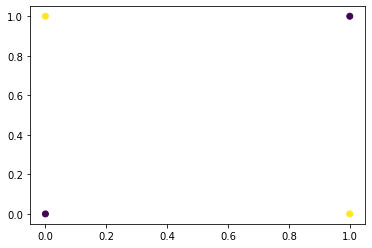

In [22]:
plt.scatter(x1, x2, c=y)

In [23]:
def create_dataset(x1, x2, y):

    x1 = np.repeat(x1, 50)
    x2 = np.repeat(x2, 50)
    y = np.repeat(y, 50)

    x1 = x1 + np.random.rand(x1.shape[0])*0.05
    x2 = x2 + np.random.rand(x2.shape[0])*0.05

    index_shuffle = np.arange(x1.shape[0])
    np.random.shuffle(index_shuffle)

    x1 = x1.astype(np.float32)
    x2 = x2.astype(np.float32)
    y = y.astype(np.float32)

    x1 = x1[index_shuffle]
    x2 = x2[index_shuffle]
    y = y[index_shuffle]

    x1_torch = torch.from_numpy(x1).clone().view(-1,1)
    x2_torch = torch.from_numpy(x2).clone().view(-1,1)
    y_torch = torch.from_numpy(y).clone().view(-1,1)

    x = torch.hstack([x1_torch, x2_torch])

    x_train = x[:150,:]
    x_test = x[150:,:]
    y_train = y_torch[:150,:]
    y_test = y_torch[150:,:]

    return x_train, x_test, y_train, y_test

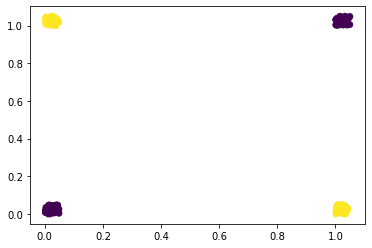

In [24]:
x_train, x_test, y_train, y_test = create_dataset(x1, x2, y)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)

In [25]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.linear(x)
        outputs = torch.sigmoid(x)
        return outputs

In [26]:
model_AND = LogisticRegression(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_AND.parameters(), lr=0.01)

In [27]:
def train(model, criterion, optimizer, x, y, iter):
    all_loss = []
    for epoch in range(iter):
        y_hat = model(x)

        loss = criterion(y_hat, y)

        all_loss.append(loss.item())
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    return all_loss

In [28]:
all_loss = train(model_AND, criterion, optimizer, x_train, y_train, 50000)

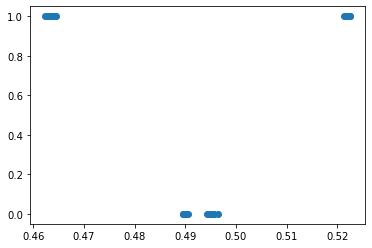

In [29]:
y_pred = model_AND.forward(x_test)

plt.scatter(y_pred.detach().numpy(), y_test)

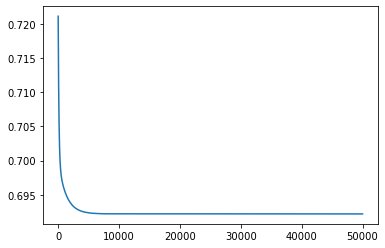

In [30]:
plt.plot(all_loss)